# Big Mart Sales Prediction

The Big Mart Sales challenge, a regression practice problem wherein we have to predict product-wise and store-wise sales.

This project is divided into:

1. Exploratory Data Analysis
2. Data Preparation
3. Predictive Modeling using different techniques.

We will handle this problem in a structured way. We will be following the table of content given below.

1. Problem Statement
2. Hypothesis Generation
3. Loading Packages and Data
4. Data Structure and Content
5. Exploratory Data Analysis
    1. Univariate Analysis
    2. Bivariate Analysis
6. Missing Value Treatment
7. Feature Engineering
8. Encoding Categorical Variables
    1. Label Encoding
    2. One Hot Encoding
9. PreProcessing Data
10. Modeling
    1. Linear Regression
    2. Regularized Linear Regression
    3. RandomForest
    4. XGBoost
11. Summary

Understanding the problem statement is the first and foremost step. This would help you give an intuition of what you will face ahead of time. Let us see the problem statement -

**The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products. Same is the case with each store.**

**The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers at BigMart to find out the properties of any product or store, which play a key role in increasing the overall sales.**

Looks intriguing right? You will get to dive into the solution in the next sections.

## What is hypothesis generation?

This is a very important stage in any machine learning process. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

## How to do hypothesis generation?

One very effective technique to generate hypotheses is by creating mindmaps. You can draw it even using a pen and paper. The general methodology is as follows: Write the main idea in the center. Draw branches from the center such they are connected with one another with final outputs shown towards the end.

We can start the process by working on four levels: Store Level, Product Level, Customer Level and Macro Level.

## Store Level Hypotheses

1. **City type:** Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.

2. **Population Density:** Stores located in densely populated areas should have higher sales because of more demand. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.

3. **Competitors:** Stores having similar establishments nearby should have less sales because of more competition.

4. **Marketing:** Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.

5. **Location:** Stores located within popular marketplaces should have higher sales because of better access to customers.

6. **Ambiance:** Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

## Product Level Hypotheses

1. **Brand:** Branded products should have higher sales because of higher trust in the customer.

2. **Packaging:** Products with good packaging can attract customers and sell more.

3. **Utility:** Daily use products should have a higher tendency to sell as compared to the specific use products.

4. **Display Area:** Products which are given bigger shelves in the store are likely to catch attention first and sell more. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

5. **Advertising:** Better advertising of products in the store will should higher sales in most cases. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

## Customer Level Hypotheses

1. **Customer Behavior:** Stores keeping the right set of products to meet the local needs of customers will have higher sales.

2. **Job Profile:** Customer working at executive levels would have higher chances of purchasing high amount products as compared to customers working at entry or mid senior level.

3. **Family Size:** More the number of family members, more amount will be spent by a customer to buy products.

4. **Annual Income:** Higher the annual income of a customer, customer is more likely to buy high cost products. Past Purchase History: Availablity of this information can help us to determine the frequency of a product being purchased by a user.

## Macro Level Hypotheses

1. **Environment:** If the environment is declared safe by government, customer would be more likely to purchase products without worrying if it’s environment friendly or not.

2. **Economic Growth:** If the current economy shows a consistent growth, per capita income will rise, therefore buying power of customers will increase.

Please note that this is not an exhaustive list. You can come up with more hypotheses of your own, the more the better. Let’s begin exploring the dataset and try to find interesting patterns.

## Loading Packages

In [1]:
library(data.table) # used for reading and manipulation of data. 
library(dplyr) # used for data manipulation and joining. 
library(ggplot2)# used for ploting. 
library(caret) # used for modeling. 
library(corrplot)# used for making correlation plot. 
library(xgboost)# used for building XGBoost model. 
library(cowplot)# used for combining multiple plots .
library(ranger)
options(warn = -1)# supress warnings.

Warning message:
"package 'data.table' was built under R version 3.5.2"Warning message:
"package 'dplyr' was built under R version 3.5.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'caret' was built under R version 3.5.2"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.5.2"Warning message:
"package 'corrplot' was built under R version 3.5.2"corrplot 0.84 loaded
Warning message:
"package 'xgboost' was built under R version 3.5.2"
Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice

Warning message:
"package 'cowplot' was built under R version 3.5.2"
Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

 

## Reading Data

At the competition’s page, we are provided with 3 CSV files — Train, Test, and Sample Submissions.

* The Train file contains 11 independent variables and 1 target variable, i.e., Item_Outlet_Sales.
* The Test file also contains the same set of independent variables, but there is no target variable because that is what we have to predict.
* The Sample Submissions file contains the format in which we have to submit our predictions.

We will use fread() function of data.table package to read the datasets.

In [2]:
train = fread("C:\\Users\\CWILLIAN\\Desktop\\Big Mart Sales Prediction Using R\\Train.csv")
test = fread("C:\\Users\\CWILLIAN\\Desktop\\Big Mart Sales Prediction Using R\\Test.csv")
submission = fread("C:\\Users\\CWILLIAN\\Desktop\\Big Mart Sales Prediction Using R\\SampleSubmission.csv")

Initially we should understand our raw data thoroughly, i.e., we should explore the no. of features/columns and rows, datatype of the features, feature names and so on. It helps in working with the data in the next stages.

## Dimensions of Data

Let’s quicky check the dimensions of our data, i.e., columns and rows.

In [3]:
dim(train);
dim(test)

[1] 8523   12

[1] 5681   11

train dataset has 8523 rows and 12 features and test has 5681 rows and 11 columns. train has 1 extra column which is the target variable. We will predict this target variable for the test dataset later.

## Features of Data

We will take a quick glance over the feature names of train and test datasets.

In [4]:
names(train)

[1] "Item_Identifier"           "Item_Weight"              
 [3] "Item_Fat_Content"          "Item_Visibility"          
 [5] "Item_Type"                 "Item_MRP"                 
 [7] "Outlet_Identifier"         "Outlet_Establishment_Year"
 [9] "Outlet_Size"               "Outlet_Location_Type"     
[11] "Outlet_Type"               "Item_Outlet_Sales"

In [5]:
names(test)

[1] "Item_Identifier"           "Item_Weight"              
 [3] "Item_Fat_Content"          "Item_Visibility"          
 [5] "Item_Type"                 "Item_MRP"                 
 [7] "Outlet_Identifier"         "Outlet_Establishment_Year"
 [9] "Outlet_Size"               "Outlet_Location_Type"     
[11] "Outlet_Type"

Item_Outlet_Sales is present in train but not in test dataset because this is the target variable that we have to predict.

## Structure of Data

In R, we have a pretty handy function called str(). It gives a short summary of all the features present in a dataframe. Let’s apply it on train and test data.

In [6]:
str(train)

Classes 'data.table' and 'data.frame':	8523 obs. of  12 variables:
 $ Item_Identifier          : chr  "FDA15" "DRC01" "FDN15" "FDX07" ...
 $ Item_Weight              : num  9.3 5.92 17.5 19.2 8.93 ...
 $ Item_Fat_Content         : chr  "Low Fat" "Regular" "Low Fat" "Regular" ...
 $ Item_Visibility          : num  0.016 0.0193 0.0168 0 0 ...
 $ Item_Type                : chr  "Dairy" "Soft Drinks" "Meat" "Fruits and Vegetables" ...
 $ Item_MRP                 : num  249.8 48.3 141.6 182.1 53.9 ...
 $ Outlet_Identifier        : chr  "OUT049" "OUT018" "OUT049" "OUT010" ...
 $ Outlet_Establishment_Year: int  1999 2009 1999 1998 1987 2009 1987 1985 2002 2007 ...
 $ Outlet_Size              : chr  "Medium" "Medium" "Medium" "" ...
 $ Outlet_Location_Type     : chr  "Tier 1" "Tier 3" "Tier 1" "Tier 3" ...
 $ Outlet_Type              : chr  "Supermarket Type1" "Supermarket Type2" "Supermarket Type1" "Grocery Store" ...
 $ Item_Outlet_Sales        : num  3735 443 2097 732 995 ...
 - attr(*, ".i

In [7]:
str(test)

Classes 'data.table' and 'data.frame':	5681 obs. of  11 variables:
 $ Item_Identifier          : chr  "FDW58" "FDW14" "NCN55" "FDQ58" ...
 $ Item_Weight              : num  20.75 8.3 14.6 7.32 NA ...
 $ Item_Fat_Content         : chr  "Low Fat" "reg" "Low Fat" "Low Fat" ...
 $ Item_Visibility          : num  0.00756 0.03843 0.09957 0.01539 0.1186 ...
 $ Item_Type                : chr  "Snack Foods" "Dairy" "Others" "Snack Foods" ...
 $ Item_MRP                 : num  107.9 87.3 241.8 155 234.2 ...
 $ Outlet_Identifier        : chr  "OUT049" "OUT017" "OUT010" "OUT017" ...
 $ Outlet_Establishment_Year: int  1999 2007 1998 2007 1985 1997 2009 1985 2002 2007 ...
 $ Outlet_Size              : chr  "Medium" "" "" "" ...
 $ Outlet_Location_Type     : chr  "Tier 1" "Tier 2" "Tier 3" "Tier 2" ...
 $ Outlet_Type              : chr  "Supermarket Type1" "Supermarket Type1" "Grocery Store" "Supermarket Type1" ...
 - attr(*, ".internal.selfref")=<externalptr> 


As we can see, there are 4 numeric and 7 categorical variables.

## Combine Train and Test

To explore data in any data science competition, it is advisable to append test data to the train data. Combining train and test sets saves a lot of time and effort because if we have to make any modification in the data, we would make the change only in the combined data and not in train and test data separately. Later we can always split the combined data back to train and test.

For example, if we wish to multiply Item_Fat_Content variable by 100, we can do it for the train and test data separately or we can do the same operation once for the combined dataset. The latter approach is more efficient when there are a lot of changes to be made.

So, we will go ahead combine both train and test data and will carry out data visualization, feature engineering, one-hot encoding, and label encoding. Later we would split this combined data back to train and test datasets.

In [8]:
test[,Item_Outlet_Sales := NA] # Number of columns must be equal, so let's input NA

In [9]:
combi = rbind(train, test) # combining train and test datasets

In [10]:
dim(combi)

[1] 14204    12

## Why do we need Exploratory Data Analysis (EDA)?

After understanding the dimensions and properties of data, we have to deep dive and explore the data visually. It helps us in understanding the nature of data in terms of distribution of the individual variables/features, finding missing values, relationship with other variables and many other things.

Let’s start with univariate EDA. It involves exploring variables individually. We will try to visualize the continuous variables using histograms and categorical variables using bar plots.

## Target Variables

Since our target variable is continuous, we can visualise it by plotting its histogram.

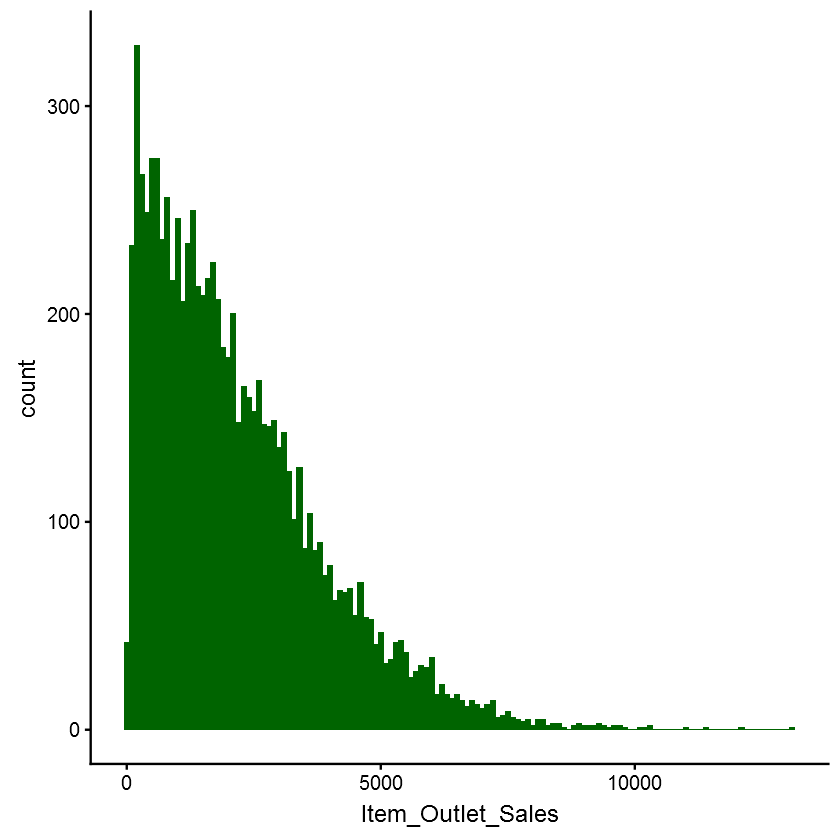

In [11]:
ggplot(train) + 
geom_histogram(aes(train$Item_Outlet_Sales), binwidth = 100, fill = "darkgreen") +  
xlab("Item_Outlet_Sales")


As you can see, it is a right skewd variable and would need some data transformation to treat its skewness.

## Independent Variables (numeric variables)

Now let’s check the numeric independent variables. We’ll again use the histograms for visualizations because that will help us in visualizing the distribution of the variables.

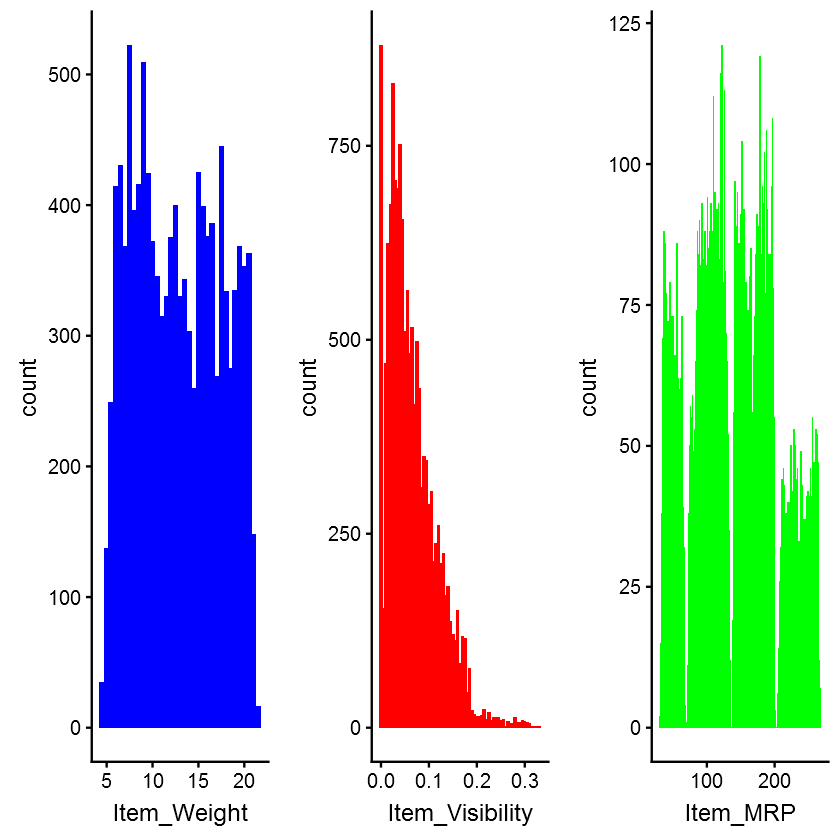

In [12]:
p1 = ggplot(combi) + geom_histogram(aes(Item_Weight), binwidth = 0.5, fill = "blue") 
p2 = ggplot(combi) + geom_histogram(aes(Item_Visibility), binwidth = 0.005, fill = "red") 
p3 = ggplot(combi) + geom_histogram(aes(Item_MRP), binwidth = 1, fill = "green") 
plot_grid(p1, p2, p3, nrow = 1) # plot_grid() from cowplot package

## Observations

* There seems to be no clear-cut pattern in Item_Weight.
* Item_Visibility is right-skewed and should be transformed to curb its skewness.
* We can clearly see 4 different distributions for Item_MRP. It is an interesting insight.


## Independent Variables (categorical variables)


Now we’ll try to explore and gain some insights from the categorical variables. A categorical variable or feature can have only a finite set of values. Let’s first plot Item_Fat_Content.

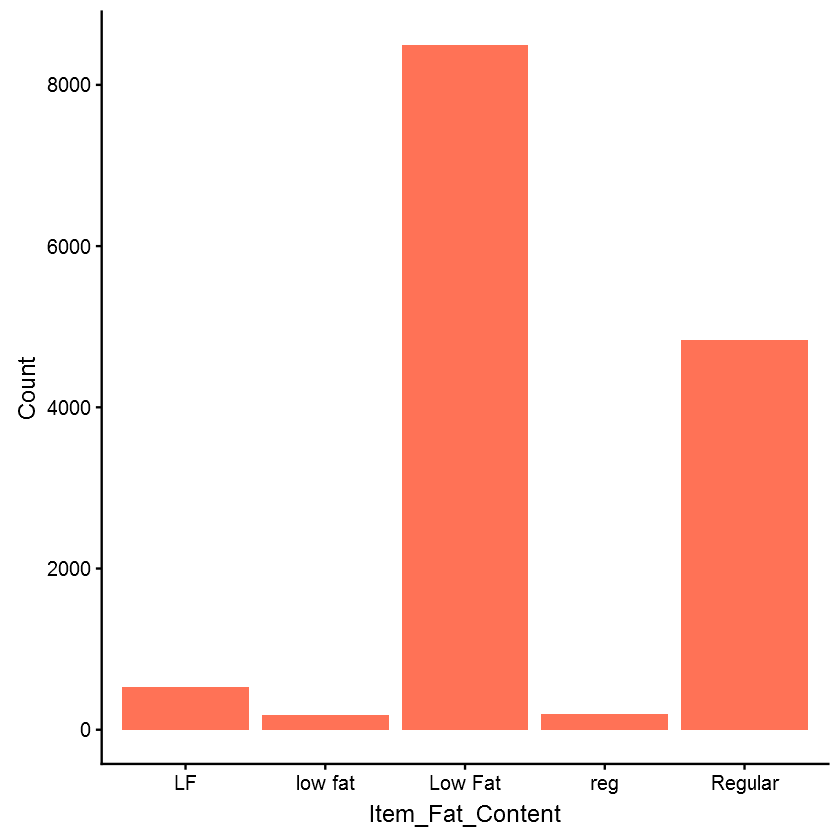

In [13]:
ggplot(combi %>% group_by(Item_Fat_Content) %>% summarise(Count = n())) +   
geom_bar(aes(Item_Fat_Content, Count), stat = "identity", fill = "coral1")

In the figure above, ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one. Similarly we can be done for ‘reg’ and ‘Regular’ into one. After making these corrections we’ll plot the same figure again.

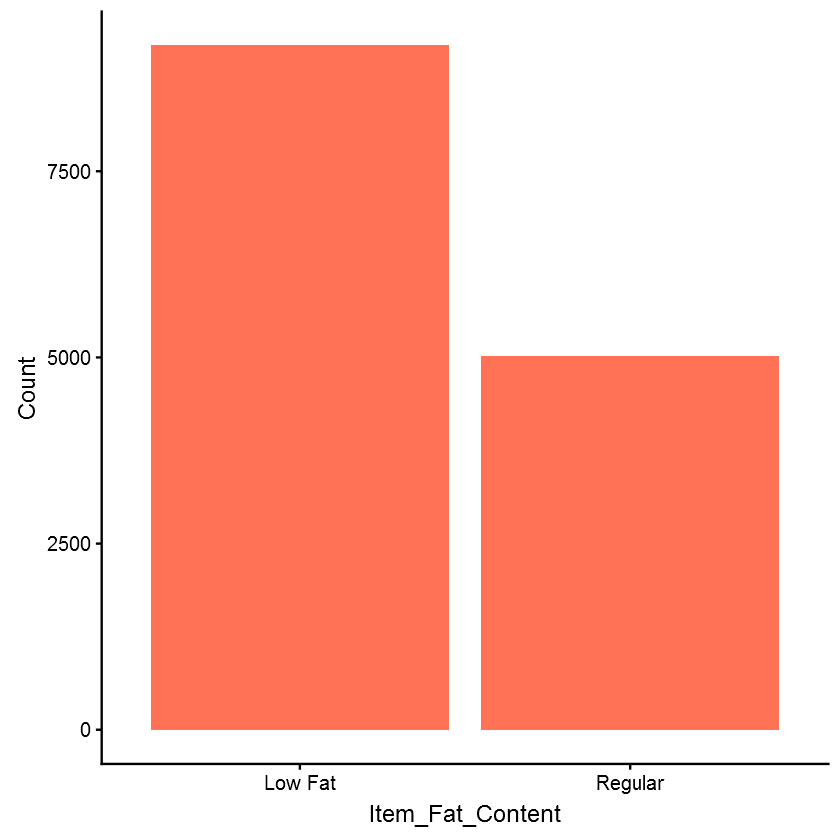

In [14]:
combi$Item_Fat_Content[combi$Item_Fat_Content == "LF"] = "Low Fat" 
combi$Item_Fat_Content[combi$Item_Fat_Content == "low fat"] = "Low Fat" 
combi$Item_Fat_Content[combi$Item_Fat_Content == "reg"] = "Regular" 
ggplot(combi %>% group_by(Item_Fat_Content) %>% summarise(Count = n())) +   
geom_bar(aes(Item_Fat_Content, Count), stat = "identity", fill = "coral1")

Now let’s check the other categorical variables.

In [15]:
# plot for Item_Type 
p4 = ggplot(combi %>% 
            group_by(Item_Type) %>% 
            summarise(Count = n())) +   
            geom_bar(aes(Item_Type, Count), stat = "identity", fill = "coral1") +  
            xlab("") +  
            geom_label(aes(Item_Type, Count, label = Count), vjust = 0.5) +  
            theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  
            ggtitle("Item_Type")


In [16]:
# plot for Outlet_Identifier 
p5 = ggplot(combi %>% 
            group_by(Outlet_Identifier) %>% 
            summarise(Count = n())) +   
            geom_bar(aes(Outlet_Identifier, Count), stat = "identity", fill = "coral1") +  
            geom_label(aes(Outlet_Identifier, Count, label = Count), vjust = 0.5) +  
            theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [17]:
# plot for Outlet_Size 
p6 = ggplot(combi %>% 
            group_by(Outlet_Size) %>% 
            summarise(Count = n())) +   
            geom_bar(aes(Outlet_Size, Count), stat = "identity", fill = "coral1") +  
            geom_label(aes(Outlet_Size, Count, label = Count), vjust = 0.5) +  
            theme(axis.text.x = element_text(angle = 90, hjust = 1))
           

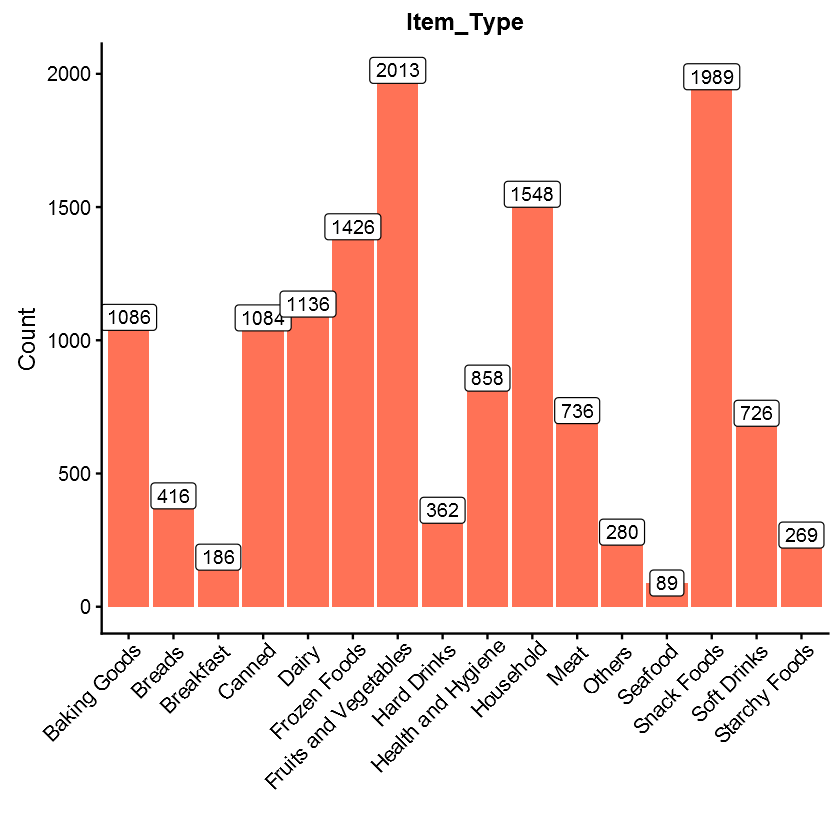

In [18]:
p4

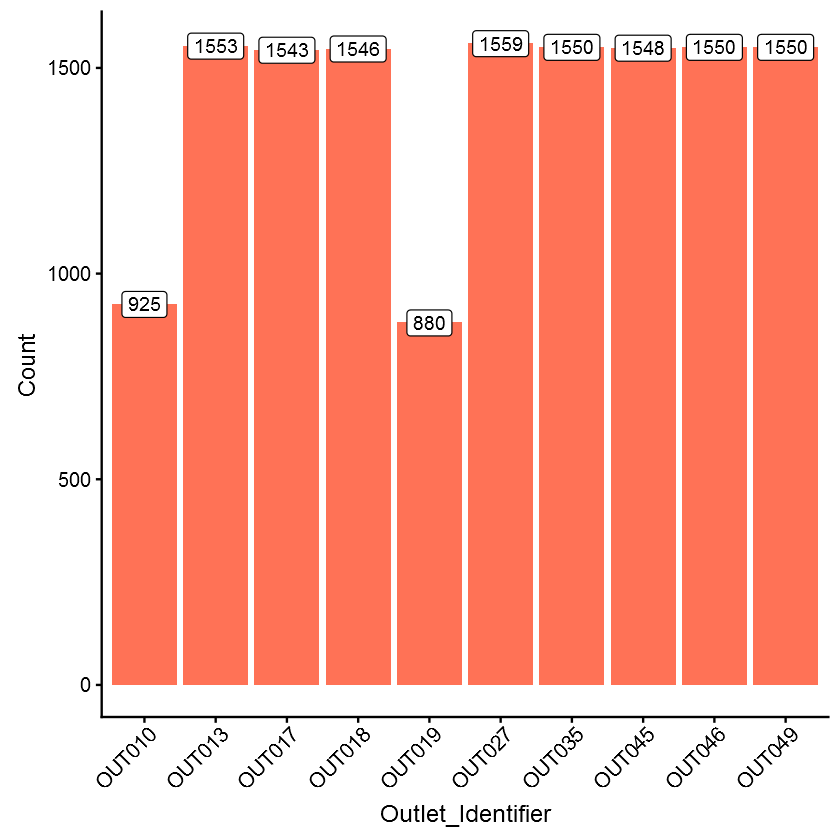

In [19]:
p5

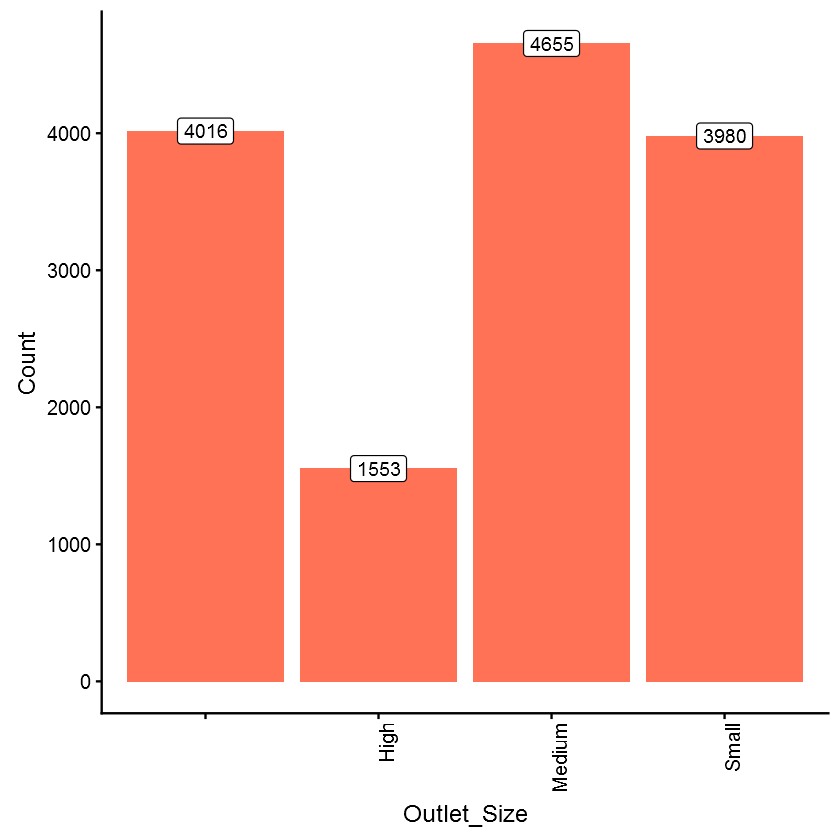

In [20]:
p6

In Outlet_Size’s plot, for 4016 observations, Outlet_Size is blank or missing.We will check for this in the bivariate analysis to substitute the missing values in the Outlet_Size.

We’ll also check the remaining categorical variables.

In [21]:
# plot for Outlet_Establishment_Year 
p7 = ggplot(combi %>% group_by(Outlet_Establishment_Year) %>% summarise(Count = n())) +   
geom_bar(aes(factor(Outlet_Establishment_Year), Count), stat = "identity", fill = "coral1") +  
geom_label(aes(factor(Outlet_Establishment_Year), Count, label = Count), vjust = 0.5) +  
xlab("Outlet_Establishment_Year") +  
theme(axis.text.x = element_text(size = 8.5))

In [22]:
# plot for Outlet_Type 
p8 = ggplot(combi %>% group_by(Outlet_Type) %>% summarise(Count = n())) +   
geom_bar(aes(Outlet_Type, Count), stat = "identity", fill = "coral1") +  
geom_label(aes(factor(Outlet_Type), Count, label = Count), vjust = 0.5) +  
theme(axis.text.x = element_text(size = 8.5))

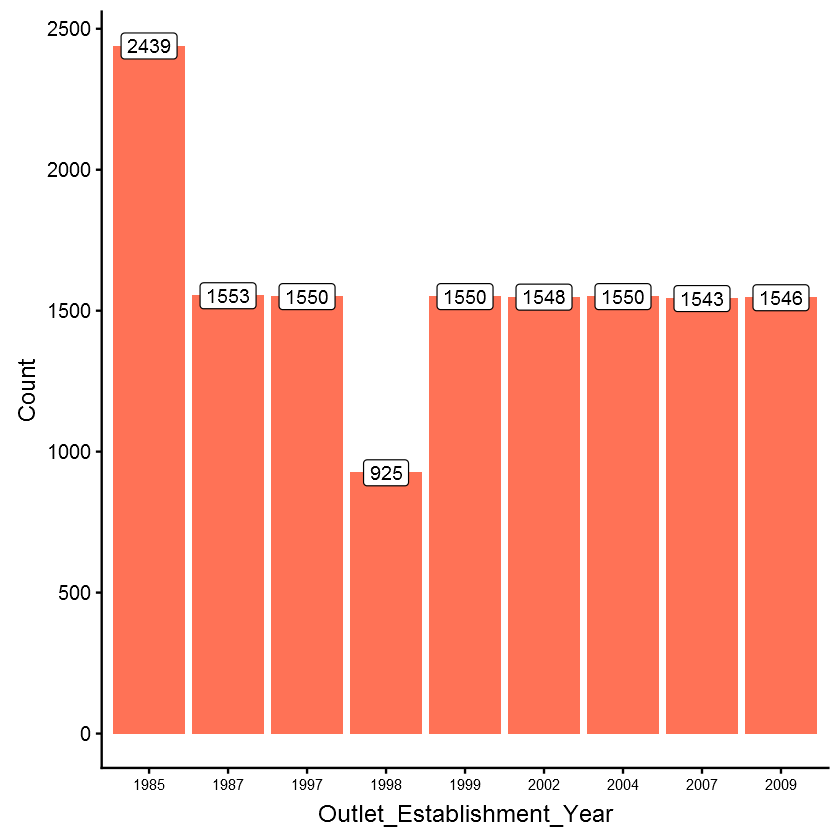

In [23]:
p7

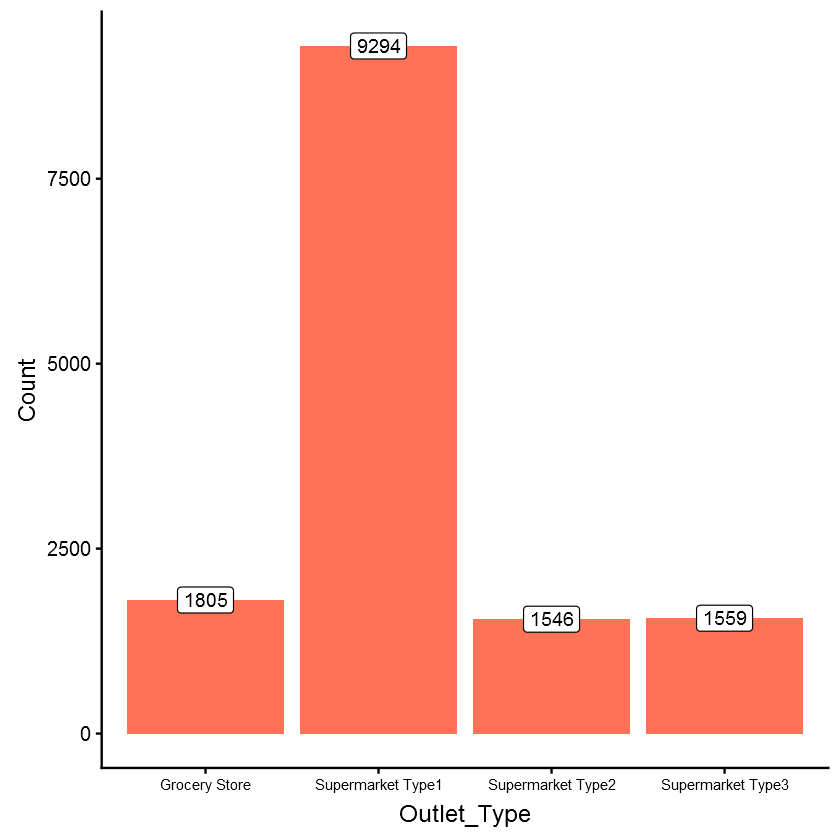

In [24]:
p8

## Observations

* Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years.
* Supermarket Type 1 seems to be the most popular category of Outlet_Type.


## Bivariate Analysis

After looking at every feature individually, let’s now do some bivariate analysis. Here we’ll explore the independent variables with respect to the target variable. The objective is to discover hidden relationships between the independent variable and the target variable and use those findings in missing data imputation and feature engineering in the next module.

We will make use of scatter plots for the continuous or numeric variables and violin plots for the categorical variables.

In [25]:
train = combi[1:nrow(train)] # extracting train data from the combined data

## Target Variable vs Independent Numerical Variables

Let’s explore the numerical variables first.

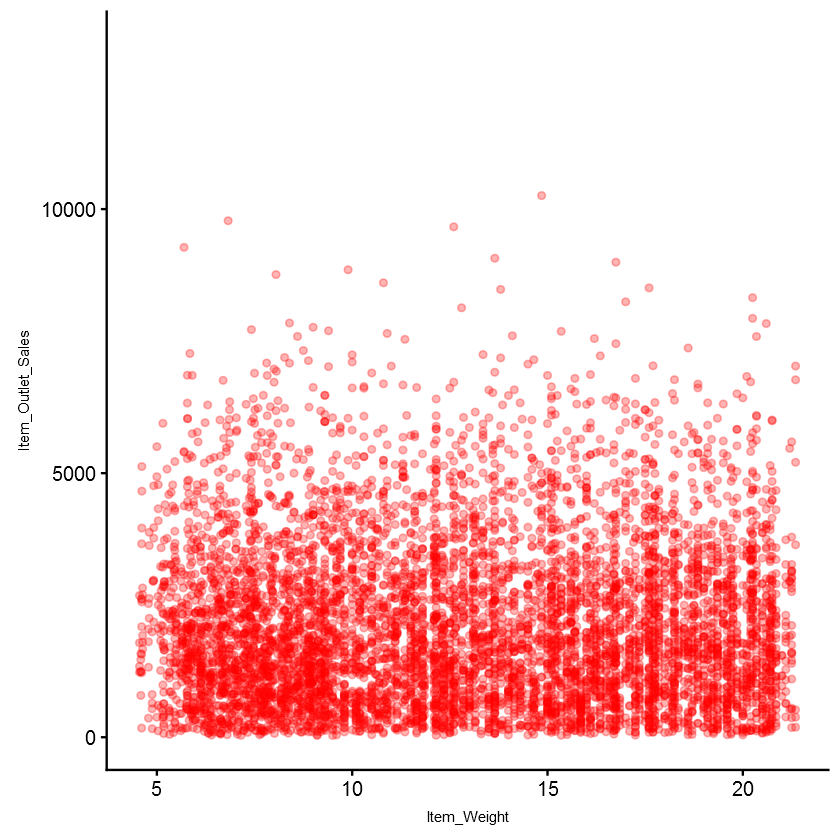

In [26]:
# Item_Weight vs Item_Outlet_Sales 
p9 = ggplot(train) +      
geom_point(aes(Item_Weight, Item_Outlet_Sales), colour = "red", alpha = 0.3) +     
theme(axis.title = element_text(size = 8.5))
p9

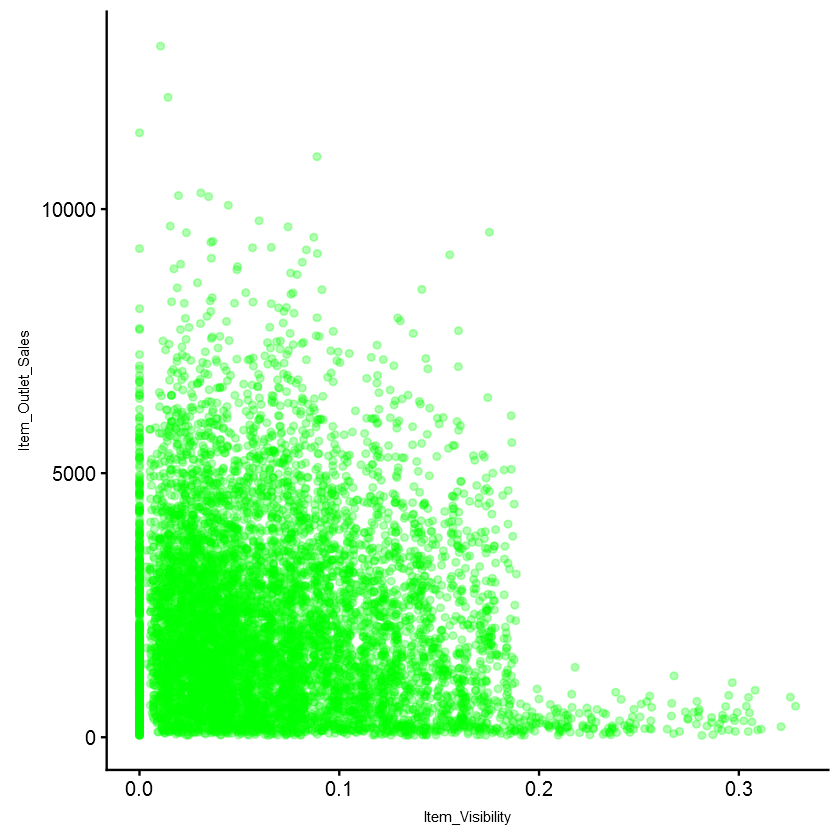

In [27]:
# Item_Visibility vs Item_Outlet_Sales 
p10 = ggplot(train) +       
geom_point(aes(Item_Visibility, Item_Outlet_Sales), colour = "green", alpha = 0.3) +      
theme(axis.title = element_text(size = 8.5))
p10

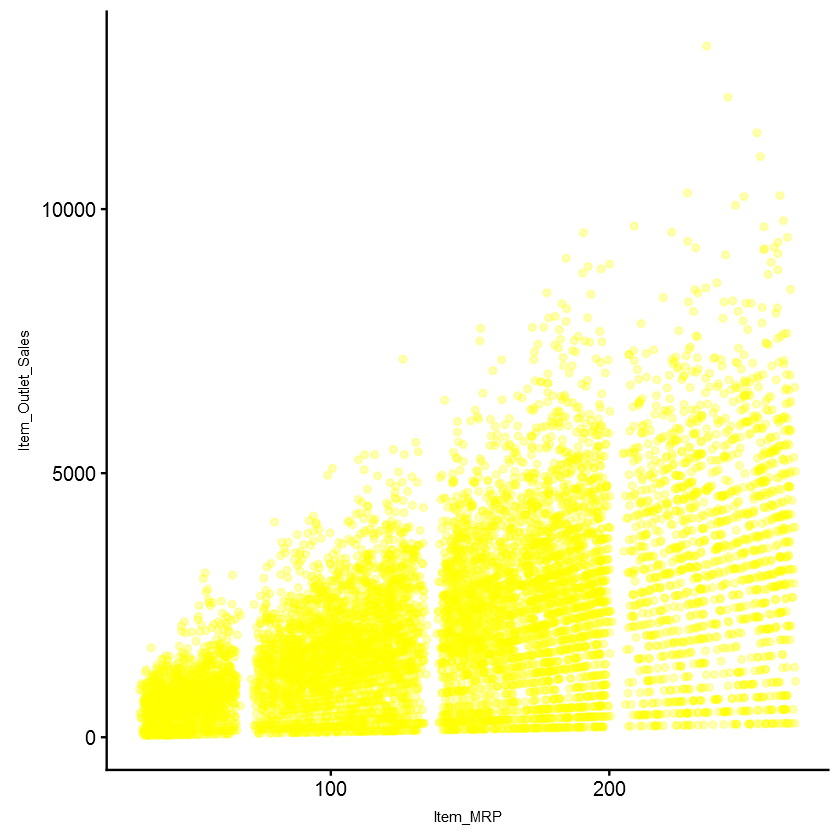

In [28]:
# Item_MRP vs Item_Outlet_Sales 
p11 = ggplot(train) +       
geom_point(aes(Item_MRP, Item_Outlet_Sales), colour = "yellow", alpha = 0.3) +      
theme(axis.title = element_text(size = 8.5))
p11

## Observations

* Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.
* In Item_Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. We will take note of this issue and deal with it in the later stages.
* In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.


## Target Variable vs Independent Categorical Variables

Now we’ll visualise the categorical variables with respect to Item_Outlet_Sales. We will try to check the distribution of the target variable across all the categories of each of the categorical variable.

We could have used boxplots here, but instead we’ll use the violin plots as they show the full distribution of the data. The width of a violin plot at a particular level indicates the concentration or density of data at that level. The height of a violin tells us about the range of the target variable values.

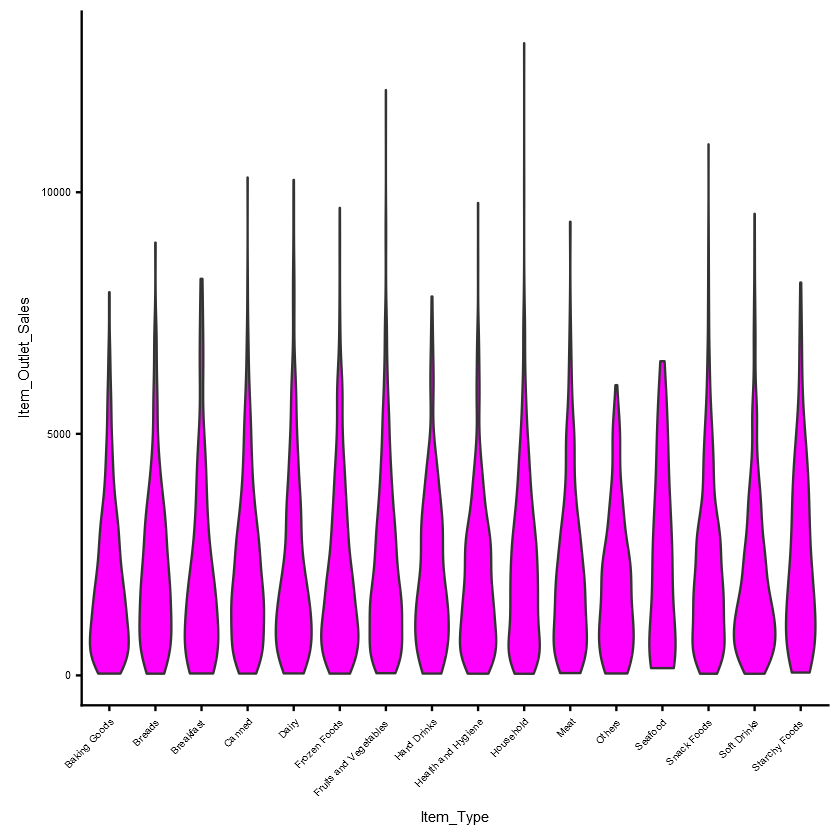

In [29]:
# Item_Type vs Item_Outlet_Sales 
p12 = ggplot(train) +       
geom_violin(aes(Item_Type, Item_Outlet_Sales), fill = "magenta") +      
theme(axis.text.x = element_text(angle = 45, hjust = 1),axis.text = element_text(size = 6), axis.title = element_text(size = 8.5))
p12

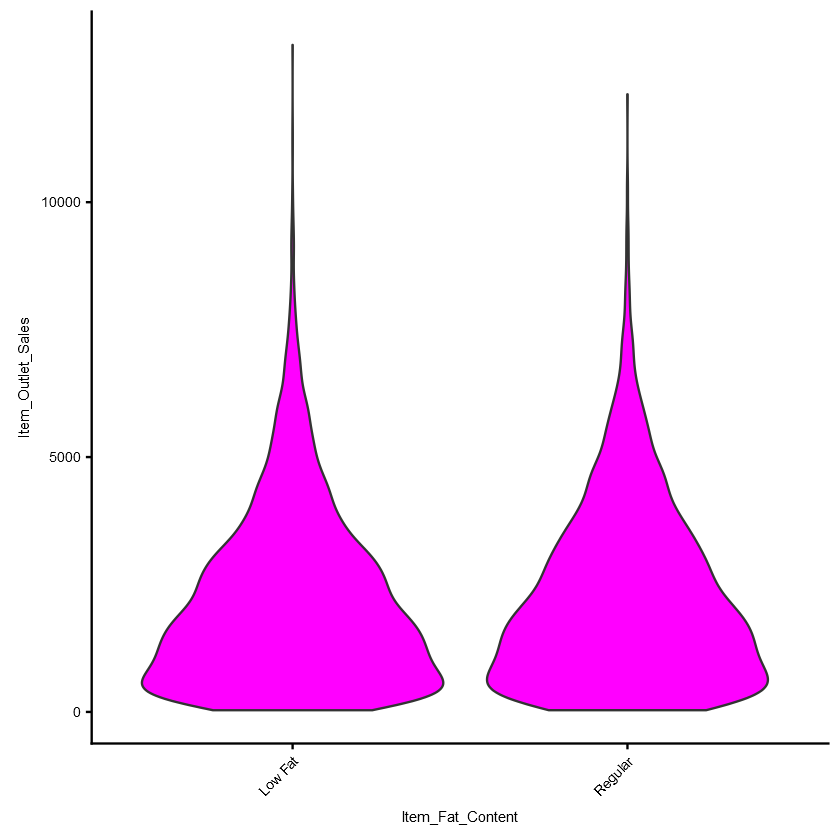

In [30]:
# Item_Fat_Content vs Item_Outlet_Sales 
p13 = ggplot(train) +       
geom_violin(aes(Item_Fat_Content, Item_Outlet_Sales), fill = "magenta") +      
theme(axis.text.x = element_text(angle = 45, hjust = 1),axis.text = element_text(size = 8), axis.title = element_text(size = 8.5))
p13

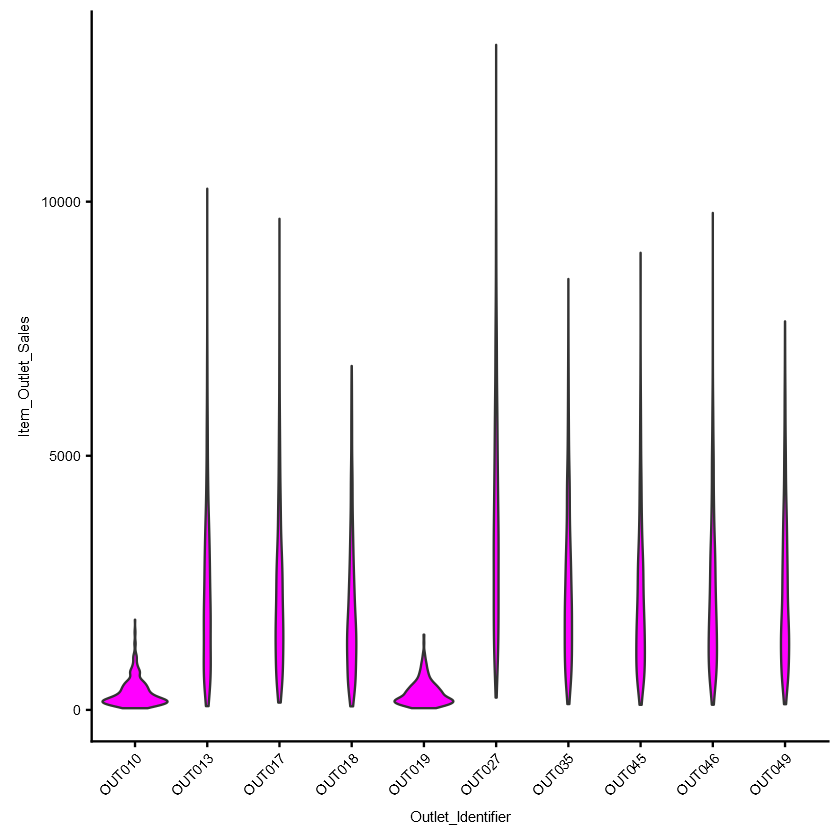

In [31]:
# Outlet_Identifier vs Item_Outlet_Sales 
p14 = ggplot(train) +       
geom_violin(aes(Outlet_Identifier, Item_Outlet_Sales), fill = "magenta") +      
theme(axis.text.x = element_text(angle = 45, hjust = 1),axis.text = element_text(size = 8),axis.title = element_text(size = 8.5))
p14

## Observations

* Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct and same is the case with Item_Fat_Content.
* The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.

In the univariate analysis, we came to know about the empty values in Outlet_Size variable. Let’s check the distribution of the target variable across Outlet_Size.

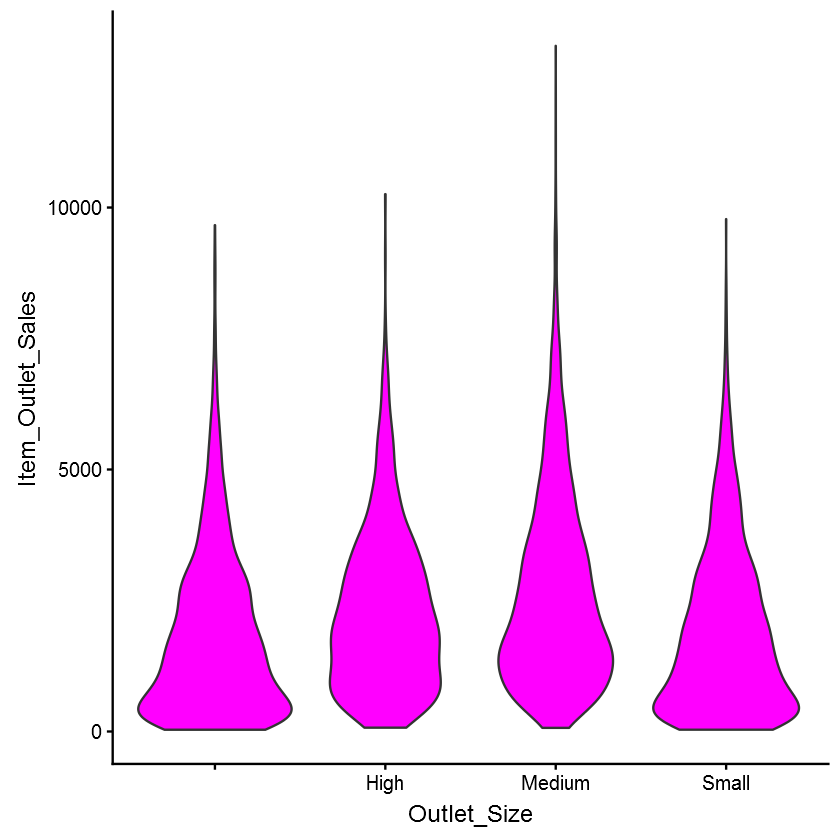

In [32]:
ggplot(train) + geom_violin(aes(Outlet_Size, Item_Outlet_Sales), fill = "magenta")

The distribution of ‘Small’ Outlet_Size is almost identical to the distribution of the blank category (first vioin) of Outlet_Size. So, we can substitute the blanks in Outlet_Size with ‘Small’.

Please note that this is not the only way to impute missing values, but for the time being we will go ahead and impute the missing values with ‘Small’.

Let’s examine the remaining variables.

In [33]:
p15 = ggplot(train) + 
geom_violin(aes(Outlet_Location_Type, Item_Outlet_Sales), fill = "magenta") 
p16 = ggplot(train) + 
geom_violin(aes(Outlet_Type, Item_Outlet_Sales), fill = "magenta") 



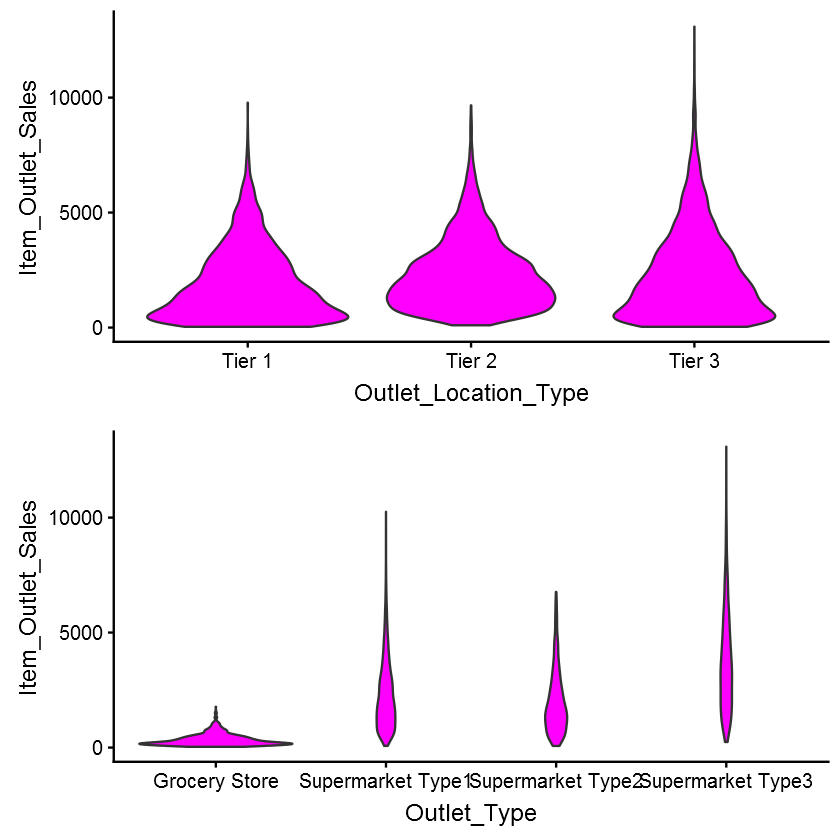

In [34]:
plot_grid(p15, p16, ncol = 1)

## Observations

* Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.
* In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.


These are the kind of insights that we can extract by visualizing our data. Hence, data visualization should be an important part of any kind data analysis.

Missing data can have a severe impact on building predictive models because the missing values might be contain some vital information which could help in making better predictions. So, it becomes imperative to carry out missing data imputation. There are different methods to treat missing values based on the problem and the data. Some of the common techniques are as follows:

1. **Deletion of rows:** In train dataset, observations having missing values in any variable are deleted. The downside of this method is the loss of information and drop in prediction power of model.

2. **Mean/Median/Mode Imputation:** In case of continuous variable, missing values can be replaced with mean or median of all known values of that variable. For categorical variables, we can use mode of the given values to replace the missing values.

3. **Building Prediction Model:** We can even make a predictive model to impute missing data in a variable. Here we will treat the variable having missing data as the target variable and the other variables as predictors. We will divide our data into 2 datasets—one without any missing value for that variable and the other with missing values for that variable. The former set would be used as training set to build the predictive model and it would then be applied to the latter set to predict the missing values.

You can try the following code to quickly find missing values in a variable.

In [35]:
sum(is.na(combi$Item_Weight))

[1] 2439

In [36]:
sum(is.na(combi$Item_Outlet_Sales))

[1] 5681

## Imputing Missing Value

As you can see above, we have missing values in Item_Weight and Item_Outlet_Sales. Missing data in Item_Outlet_Sales can be ignored since they belong to the test dataset. We’ll now impute Item_Weight with mean weight based on the Item_Identifier variable.

In [37]:
missing_index = which(is.na(combi$Item_Weight)) 
for(i in missing_index){item = combi$Item_Identifier[i] 
                        combi$Item_Weight[i] = mean(combi$Item_Weight[combi$Item_Identifier == item], na.rm = T) }

Now let’s see if there is still any missing data in Item_Weight:

In [38]:
sum(is.na(combi$Item_Weight))

[1] 0

0 missing values! It means we have successfully imputed the missing data in the feature.

## Replacing 0’s in Item_Visibility variable

Similarly, zeroes in Item_Visibility variable can be replaced with Item_Identifier wise mean values of Item_Visibility. It can be visualized in the plot below.

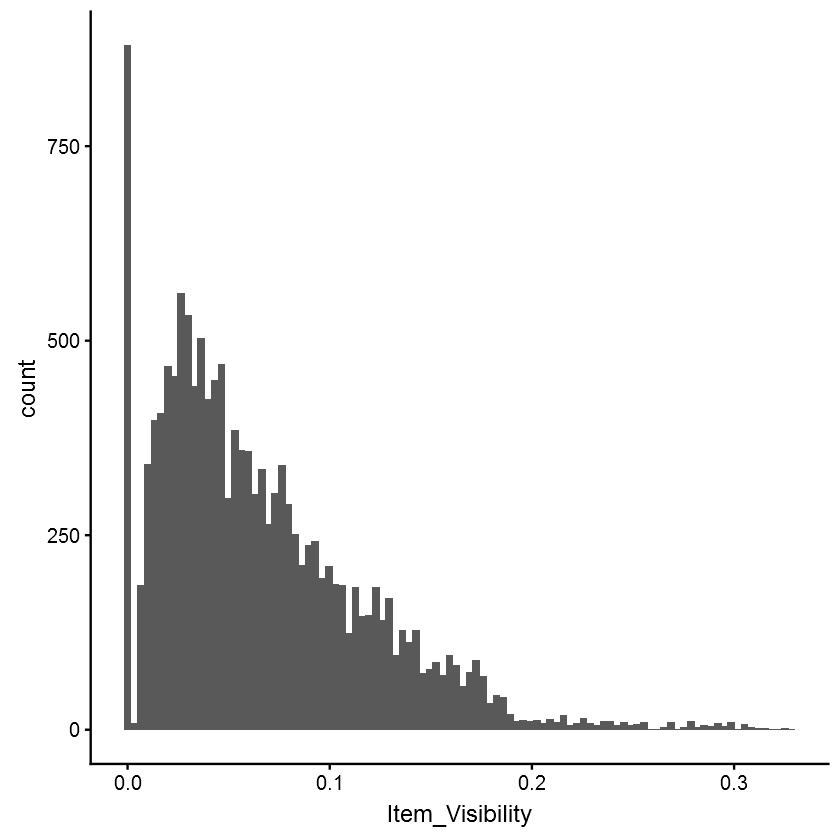

In [39]:
ggplot(combi) + 
geom_histogram(aes(Item_Visibility), bins = 100)

Let’s replace the zeroes.

In [40]:
zero_index = which(combi$Item_Visibility == 0) 
for(i in zero_index){item = combi$Item_Identifier[i]
                     combi$Item_Visibility[i] = mean(combi$Item_Visibility[combi$Item_Identifier == item], na.rm = T)  }

After the replacement of zeroes, We’ll plot the histogram of Item_Visibility again. In the histogram, we can see that the issue of zero item visibility has been resolved.

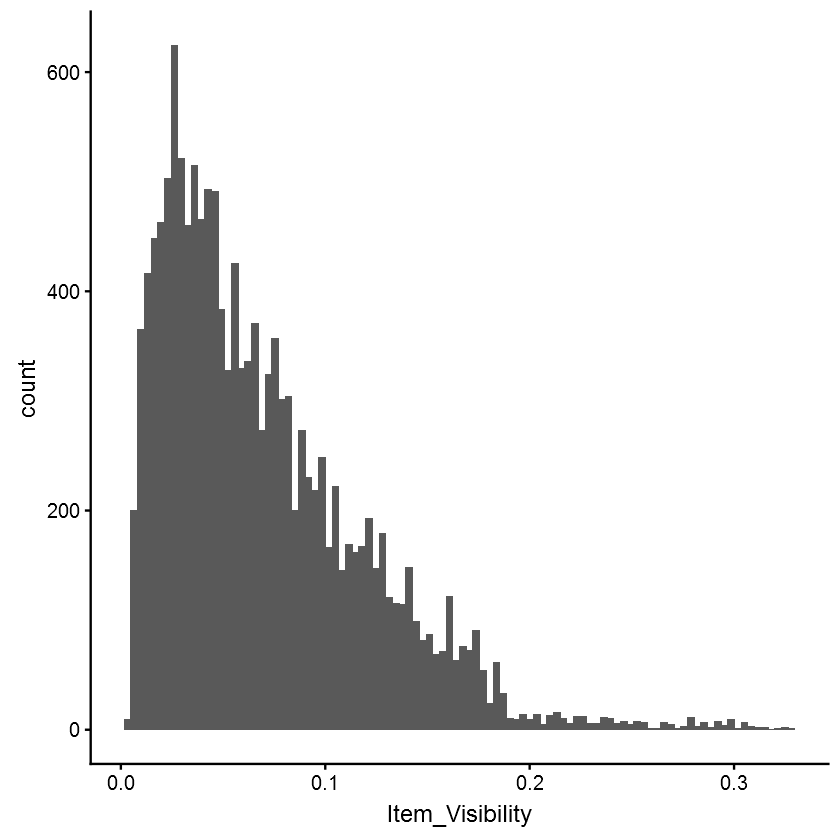

In [41]:
ggplot(combi) + 
geom_histogram(aes(Item_Visibility), bins = 100)

Most of the times, the given features in a dataset are not sufficient to give satisfactory predictions. In such cases, we have to create new features which might help in improving the model’s performance. Let’s try to create some new features for our dataset.

n this section we will create the following new features:

* **Item_Type_new:** Broader categories for the variable Item_Type.
* **Item_category:** Categorical variable derived from Item_Identifier.
* **Outlet_Years:** Years of operation for outlets.
* **price_per_unit_wt:** Item_MRP/Item_Weight
* **Item_MRP_clusters:** Binned feature for Item_MRP.

We can have a look at the Item_Type variable and classify the categories into **perishable** and **non_perishable** as per our understanding and make it into a new feature.

In [42]:
perishable = c("Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood")
non_perishable = c("Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks")
# create a new feature 'Item_Type_new' 
combi[,Item_Type_new := ifelse(Item_Type %in% perishable, "perishable", ifelse(Item_Type %in% non_perishable, "non_perishable", "not_sure"))]

Let’s compare Item_Type with the first 2 characters of Item_Identifier, i.e., ‘DR’, ‘FD’, and ‘NC’. These identifiers most probably stand for **drinks**, **food**, and **non-consumable**.

In [43]:
table(combi$Item_Type, substr(combi$Item_Identifier, 1, 2))

                       
                          DR   FD   NC
  Baking Goods             0 1086    0
  Breads                   0  416    0
  Breakfast                0  186    0
  Canned                   0 1084    0
  Dairy                  229  907    0
  Frozen Foods             0 1426    0
  Fruits and Vegetables    0 2013    0
  Hard Drinks            362    0    0
  Health and Hygiene       0    0  858
  Household                0    0 1548
  Meat                     0  736    0
  Others                   0    0  280
  Seafood                  0   89    0
  Snack Foods              0 1989    0
  Soft Drinks            726    0    0
  Starchy Foods            0  269    0

Based on the above table we can create a new feature. Let’s call it **Item_category**.

In [44]:
combi[,Item_category := substr(combi$Item_Identifier, 1, 2)]

We will also change the values of Item_Fat_Content wherever Item_category is ‘NC’ because non-consumable items cannot have any fat content. We will also create a couple of more features — **Outlet_Years** (years of operation) and **price_per_unit_wt** (price per unit weight).

In [45]:
combi$Item_Fat_Content[combi$Item_category == "NC"] = "Non-Edible" 
# years of operation for outlets 
combi[,Outlet_Years := 2013 - Outlet_Establishment_Year] 
combi$Outlet_Establishment_Year = as.factor(combi$Outlet_Establishment_Year) 
# Price per unit weight 
combi[,price_per_unit_wt := Item_MRP/Item_Weight]

Earlier in the Item_MRP vs Item_Outlet_Sales plot, we saw Item_MRP was spread across in 4 chunks. Now let’s assign a label to each of these chunks and use this label as a new variable.

In [46]:
# creating new independent variable - Item_MRP_clusters 
combi[,Item_MRP_clusters := ifelse(Item_MRP < 69, "1st",ifelse(Item_MRP >= 69 & Item_MRP < 136, "2nd", 
                                                               ifelse(Item_MRP >= 136 & Item_MRP < 203, "3rd", "4th")))]

## Encoding Categorical Variables

Most of the times, the given features in a dataset are not sufficient to give satisfactory predictions. In such cases, we have to create new features which might help in improving the model’s performance. Let’s try to create some new features for our dataset.

## Why encoding categorical variables is essential?

Most of the machine learning algorithms produce better result with numerical variables only. So, it is essential to treat the categorical variables present in the data. One thing that can be done is to completely remove the categorical variables, but that would lead to enormous loss of information. Fortunately we have smarter techniques to deal with the categorical variables.

In this stage, we will convert our categorical variables into numerical ones. We will use 2 techniques — Label Encoding and One Hot Encoding.

1. **Label encoding** simply means converting each category in a variable to a number. It is more suitable for ordinal variables — categorical variables with some order.

2. **In One hot encoding**, each category of a categorical variable is converted into a new binary column (1/0).

## Label encoding for the categorical variables

We will label encode Outlet_Size and Outlet_Location_Type as these are ordinal variables.

In [47]:
combi[,Outlet_Size_num := ifelse(Outlet_Size == "Small", 0, ifelse(Outlet_Size == "Medium", 1, 2))] 

In [48]:
combi[,Outlet_Location_Type_num := ifelse(Outlet_Location_Type == "Tier 3", 0,ifelse(Outlet_Location_Type == "Tier 2", 1, 2))] 

In [49]:
# removing categorical variables after label encoding 

combi[, c("Outlet_Size", "Outlet_Location_Type") := NULL]

## One hot encoding for the categorical variable

In [50]:
ohe = dummyVars("~.", data = combi[,-c("Item_Identifier", "Outlet_Establishment_Year", "Item_Type")], fullRank = T) 
ohe_df = data.table(predict(ohe, combi[,-c("Item_Identifier", "Outlet_Establishment_Year", "Item_Type")])) 
combi = cbind(combi[,"Item_Identifier"], ohe_df)

# PreProcessing Data

## What is Data PreProcessing?

In simple words, pre-processing refers to the transformations applied to your data before feeding it to the algorithm. It involves further cleaning of data, data transformation, data scaling and many more things.

For our data, we will deal with the skewness and scale the numerical variables.

## Removing Skewness

Skewness in variables is undesirable for predictive modeling. Some machine learning methods assume normally distributed data and a skewed variable can be transformed by taking its log, square root, or cube root so as to make its distribution as close to normal distribution as possible. In our data, variables Item_Visibility and price_per_unit_wt are highly skewed. So, we will treat their skewness with the help of log transformation.

In [51]:
combi[,Item_Visibility := log(Item_Visibility + 1)] # log + 1 to avoid division by zero 
combi[,price_per_unit_wt := log(price_per_unit_wt + 1)]

## Scaling numeric predictors

Let’s scale and center the numeric variables to make them have a mean of zero, standard deviation of one and scale of 0 to 1. Scaling and centering is required for linear regression models.

In [52]:
num_vars = which(sapply(combi, is.numeric)) # index of numeric features 
num_vars_names = names(num_vars) 
combi_numeric = combi[,setdiff(num_vars_names, "Item_Outlet_Sales"), with = F] 
prep_num = preProcess(combi_numeric, method=c("center", "scale")) 
combi_numeric_norm = predict(prep_num, combi_numeric)
combi[,setdiff(num_vars_names, "Item_Outlet_Sales") := NULL] # removing numeric independent variables 
combi = cbind(combi, combi_numeric_norm)

Splitting the combined data combi back to train and test set.

In [53]:
train = combi[1:nrow(train)] 
test = combi[(nrow(train) + 1):nrow(combi)] 
test[,Item_Outlet_Sales := NULL] # removing Item_Outlet_Sales as it contains only NA for test dataset

## Correlated Variables

Let’s examine the correlated features of train dataset. Correlation varies from -1 to 1.

1. negative correlation: < 0 and >= -1
2. positive correlation: > 0 and <= 1
3. no correlation: 0

It is not desirable to have correlated features if we are using linear regressions.

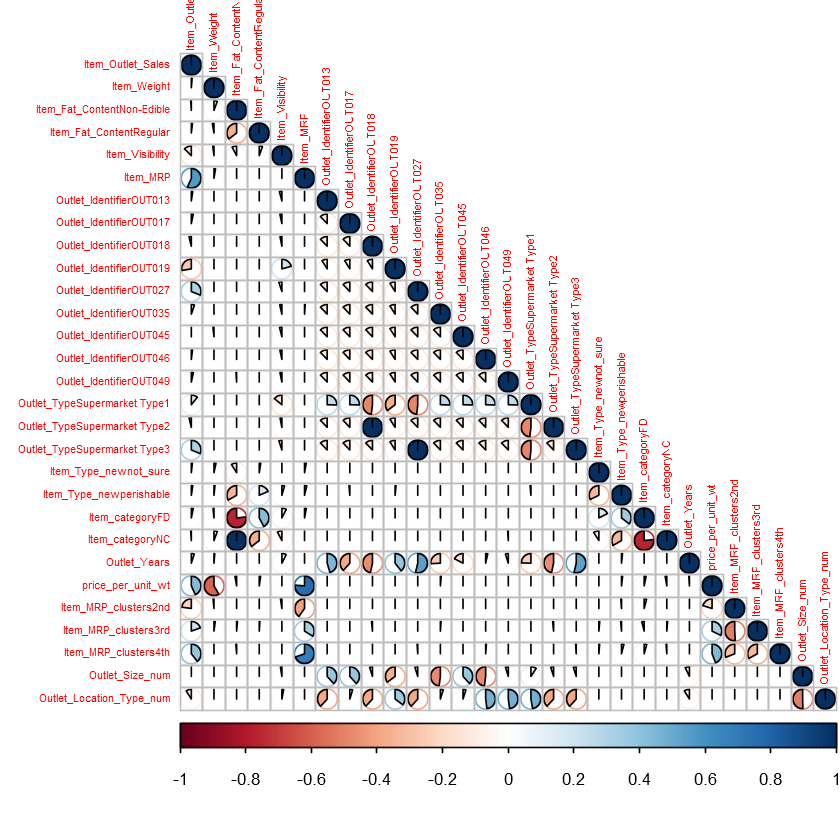

In [54]:
cor_train = cor(train[,-c("Item_Identifier")]) 
corrplot(cor_train, method = "pie", type = "lower", tl.cex = 0.5)

The correlation plot above shows correlation between all the possible pairs of variables in out data. The correlation between any two variables is represented by a pie. A blueish pie indicates positive correlation and reddish pie indicates negative correlation. The magnitude of the correlation is denoted by the area covered by the pie.

Variables price_per_unit_wt and Item_Weight are highly correlated as the former one was created from the latter. Similarly price_per_unit_wt and Item_MRP are highly correlated for the same reason.

# Model Building


Finally we have arrived at most interesting stage of the whole process — predictive modeling. We will start off with the simpler models and gradually move on to more sophisticated models. We will start with the simpler linear models and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in the next sections.

* Linear Regression
* Lasso Regression
* Ridge Regression
* RandomForest
* XGBoost

## Evaluation Metrics for Regression

The process of model building is not complete without evaluation of model’s performance. That’s why we need an evaluation metric to evaluate our model. Since this is a regression problem, we can evaluate our models using any one of the following evaluation metrics:

* **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

* **Mean Squared Error (MSE)** is the mean of the squared errors:

* **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

At the competition’s page, it has been mentioned that our submission data would be evaluated based on the RMSE score. Hence, we will use RMSE as our evaluation metric.

**Linear regression** is the simplest and most widely used statistical technique for predictive modeling

where X1, X2,…,Xn are the independent variables, Y is the target variable and all thetas are the coefficients. Magnitude of a coefficient wrt to the other coefficients determines the importance of the corresponding independent variable.

For a good linear regression model, the data should satisfy a few assumptions. One of these assumptions is that of absence of multicollinearity, i.e, the independent variables should be correlated. However, as per the correlation plot above, we have a few highly correlated independent variables in our data. This issue of multicollinearity can be dealt with regularization.

For the time being, let’s build our linear regression model with all the variables. We will use 5-fold cross validationin all the models we are going to build. Basically cross vaidation gives an idea as to how well a model generalizes to unseen data.

## Building Model

In [55]:
linear_reg_mod = lm(Item_Outlet_Sales ~ ., data = train[,-c("Item_Identifier")])

## Making Predictions on test Data

In [56]:
# preparing dataframe for submission and writing it in a csv file 
submission$Item_Outlet_Sales = predict(linear_reg_mod, test[,-c("Item_Identifier")]) 
write.csv(submission, "Linear_Reg_submit.csv", row.names = F)

**Leaderboard score:1202.328949488949.**

We have got an RMSE of 1202.33 on the public leaderboard, but this score has been calculated by using only the 25% (public) of the test data (see evaluation metric) and we have no idea how this model will perform on the other 75% (private) of the test data. So, there has to be a system in place for us to check generalizability of our model, in other words, how consistently our model performs at unseen data or new data.

To check how robust our model is to unseen data, we’ll use Cross Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for cross validation are listed below:

* The validation set approach
* k-fold cross validation
* Leave one out cross validation (LOOCV)

## k-fold Cross Validation

we will be using the k-fold cross validation (CV) to test our models. The steps followed for k-fold CV are as follows:

1. Randomly split the data into k”folds”.
2. For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold.
3. Record the error you see on each of the predictions.
4. Repeat this until each of the k-folds has served as the test set

The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model.

# Regularized Linear Regression

Regularised regression models can handle the correlated independent variables well and helps in overcoming overfitting. Ridge penalty shrinks the coefficients of correlated predictors towards each other, while the Lasso tends to pick one of a pair of correlated features and discard the other. The tuning parameter lambda controls the strength of the penalty.

## Lasso Regression

In [57]:
set.seed(1235) 
my_control = trainControl(method="cv", number=5) 
Grid = expand.grid(alpha = 1, lambda = seq(0.001,0.1,by = 0.0002)) 
lasso_linear_reg_mod = train(x = train[, -c("Item_Identifier", "Item_Outlet_Sales")], 
                             y = train$Item_Outlet_Sales,method='glmnet', trControl= my_control, tuneGrid = Grid)

In [61]:
# preparing dataframe for submission and writing it in a csv file 
submission$Item_Outlet_Sales = predict(lasso_linear_reg_mod, test[,-c("Item_Identifier")]) 
write.csv(submission, "Lasso_Reg_submit.csv", row.names = F)

**Mean validation score: 1130.02**

**Leaderboard score: 1202.26**

## Ridge Regression

In [58]:
set.seed(1236) 
my_control = trainControl(method="cv", number=5) 
Grid = expand.grid(alpha = 0, lambda = seq(0.001,0.1,by = 0.0002)) 
ridge_linear_reg_mod = train(x = train[, -c("Item_Identifier", "Item_Outlet_Sales")], 
                             y = train$Item_Outlet_Sales,method='glmnet', trControl= my_control, tuneGrid = Grid)

In [62]:
# preparing dataframe for submission and writing it in a csv file 
submission$Item_Outlet_Sales = predict(ridge_linear_reg_mod, test[,-c("Item_Identifier")]) 
write.csv(submission, "Ridge_Reg_submit.csv", row.names = F)

**Mean validation score: 1135.08**

**Leaderboard score: 1206.39**

## Random Forest

**RandomForest** is a tree based bootstrapping algorithm wherein a certain number of weak learners (decision trees) are combined to make a powerful prediction model. For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model. Final prediction can be a function of all the predictions made by the individual learners. In case of a regression problem, the final prediction can be mean of all the predictions. For detailed explanation visit this article.

We will now build a RandomForest model with 400 trees. The other tuning parameters used here are mtry — no. of predictor variables randomly sampled at each split, and min.node.size — minimum size of terminal nodes (setting this number large causes smaller trees and reduces overfitting).

In [59]:
set.seed(1237) 
my_control = trainControl(method="cv", number=5) # 5-fold CV 
tgrid = expand.grid(.mtry = c(3:10),.splitrule = "variance",.min.node.size = c(10,15,20))

In [60]:
rf_mod = train(x = train[, -c("Item_Identifier", "Item_Outlet_Sales")],
               y = train$Item_Outlet_Sales,method='ranger',
               trControl= my_control,
               tuneGrid = tgrid,num.trees = 400,
               importance = "permutation")


In [63]:
# preparing dataframe for submission and writing it in a csv file 
submission$Item_Outlet_Sales = predict(rf_mod, test[,-c("Item_Identifier")]) 
write.csv(submission, "RandomForest_submit.csv", row.names = F)

**Mean validation score: 1088.05**

**Leaderboard score: 1157.66**

Our score on the leaderboard has improved considerably by using RandomForest. Now let’s visualize the RMSE scores for different tuning parameters.

## Best Model Parameters

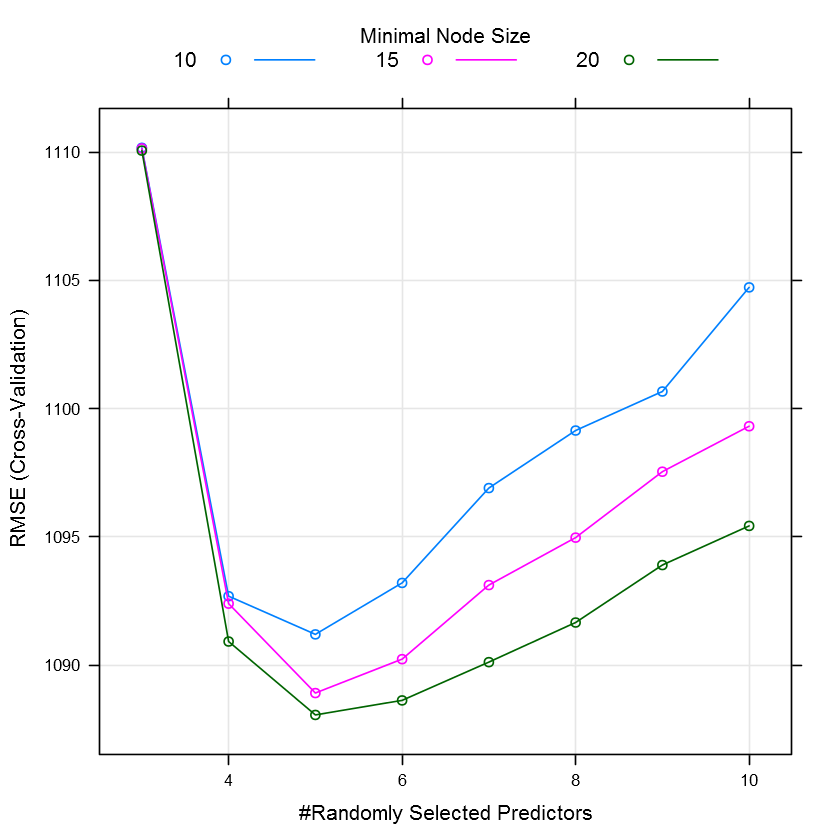

In [65]:
plot(rf_mod)

As per the plot shown above, the best score is achieved at mtry = 5 and min.node.size = 20.

Let’s plot feature importance based on the RandomForest model

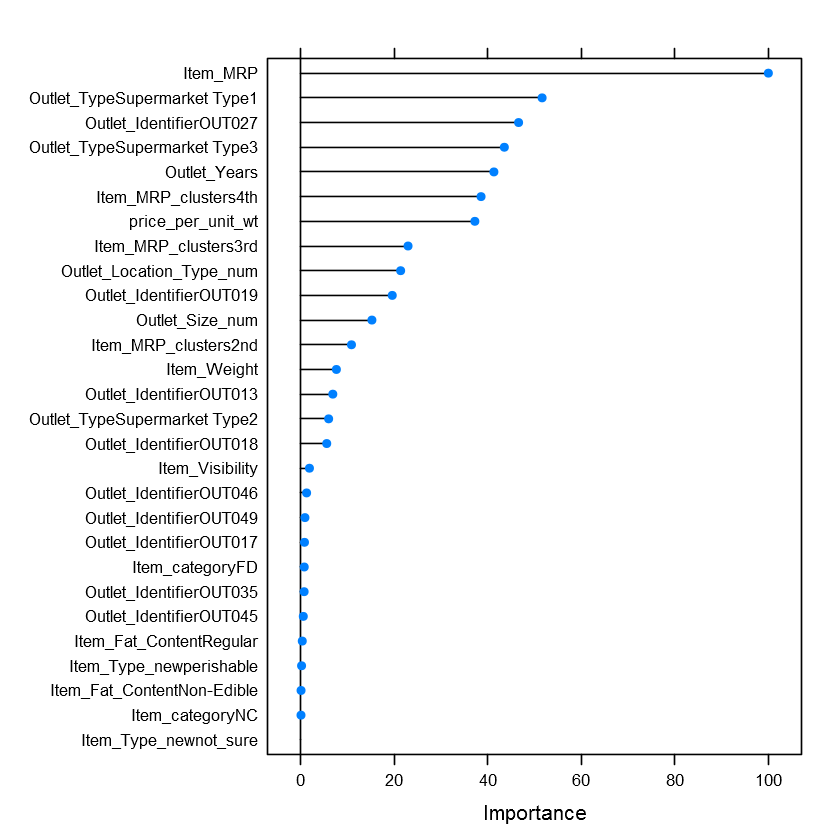

In [66]:
plot(varImp(rf_mod))

As expected Item_MRP is the most important variable in predicting the target variable. New features created by us, like price_per_unit_wt, Outlet_Years, Item_MRP_Clusters, are also among the top most important variables. This is why feature engineering plays such a crucial role in predictive modeling.

**XGBoost** is a fast and efficient algorithm and has been used to by the winners of many data science competitions.
XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables. There are many tuning parameters in XGBoost which can be broadly classified into General Parameters, Booster Parameters and Task Parameters.

1. **General parameters** refer to which booster we are using to do boosting. The commonly used are tree or linear model.
2. **Booster parameters** depend on which booster you have chosen.
3. **Learning Task parameters** that decide on the learning scenario, for example, regression tasks may use different parameters with ranking tasks.

Let’s have a look at the parameters that we are going to use in our model.

1. **eta:** It is also known as the learning rate or the shrinkage factor. It actually shrinks the feature weights to make the boosting process more conservative. The range is 0 to 1. Low eta value means the model is more robust to overfitting.
2. **gamma:** The range is 0 to ∞. Larger the gamma more conservative the algorithm is.
3. **max_depth:** We can specify maximum depth of a tree using this parameter.
4. **subsample:** It is the proportion of rows that the model will randomly select to grow trees.
5. **colsample_bytree:** It is the ratio of variables randomly chosen to build each tree in the model.

In [67]:
param_list = list(objective = "reg:linear", eta=0.01,gamma = 1,max_depth=6,subsample=0.8,colsample_bytree=0.5)

In [70]:
dtrain = xgb.DMatrix(data = as.matrix(train[,-c("Item_Identifier", "Item_Outlet_Sales")]), 
                     label= train$Item_Outlet_Sales) 

dtest = xgb.DMatrix(data = as.matrix(test[,-c("Item_Identifier")]))

## Cross Validation

We are going to use the xgb.cv() function for cross validation. This function comes with the xgboost package itself. Here we are using cross validation for finding the optimal value of nrounds.

In [72]:
set.seed(112) 
xgbcv = xgb.cv(params = param_list,data = dtrain,nrounds = 1000,nfold = 5,print_every_n = 10,
                             early_stopping_rounds = 30,maximize = F)

[1]	train-rmse:2746.215039+7.810277	test-rmse:2746.245654+30.448360 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 30 rounds.

[11]	train-rmse:2536.453809+6.977201	test-rmse:2537.916455+29.828179 
[21]	train-rmse:2347.993408+4.658836	test-rmse:2351.349707+30.857763 
[31]	train-rmse:2179.374268+4.936206	test-rmse:2184.264111+29.588871 
[41]	train-rmse:2028.145386+4.713442	test-rmse:2034.932080+28.911011 
[51]	train-rmse:1897.684155+4.019862	test-rmse:1906.991113+29.038118 
[61]	train-rmse:1780.589478+3.185405	test-rmse:1792.555981+28.949576 
[71]	train-rmse:1676.511133+1.821143	test-rmse:1691.334668+29.074120 
[81]	train-rmse:1585.409277+1.396583	test-rmse:1603.014722+29.344584 
[91]	train-rmse:1507.232690+1.397123	test-rmse:1527.780420+29.489397 
[101]	train-rmse:1437.886328+1.256552	test-rmse:1461.400610+28.467078 
[111]	train-rmse:1377.306177+1.635018	test-rmse:1404.071069+27.836844 
[121]	train-rmse:1325.02841

## Model Training

As per the verbose above, we got the best validation/test score at the 443th iteration. Hence, we will use nrounds = 443 for building the XGBoost model.

In [73]:
xgb_model = xgb.train(data = dtrain, params = param_list, nrounds = 443)

In [83]:
# preparing dataframe for submission and writing it in a csv file 
submission$Item_Outlet_Sales = predict(xgb_model, data.matrix(test[,-c("Item_Identifier")])) 
write.csv(submission, "XGBoost_submit.csv", row.names = F)

**Leaderboard score: 1155.84**

This model has even outperformed the RandomForest model.

## Variable Importance

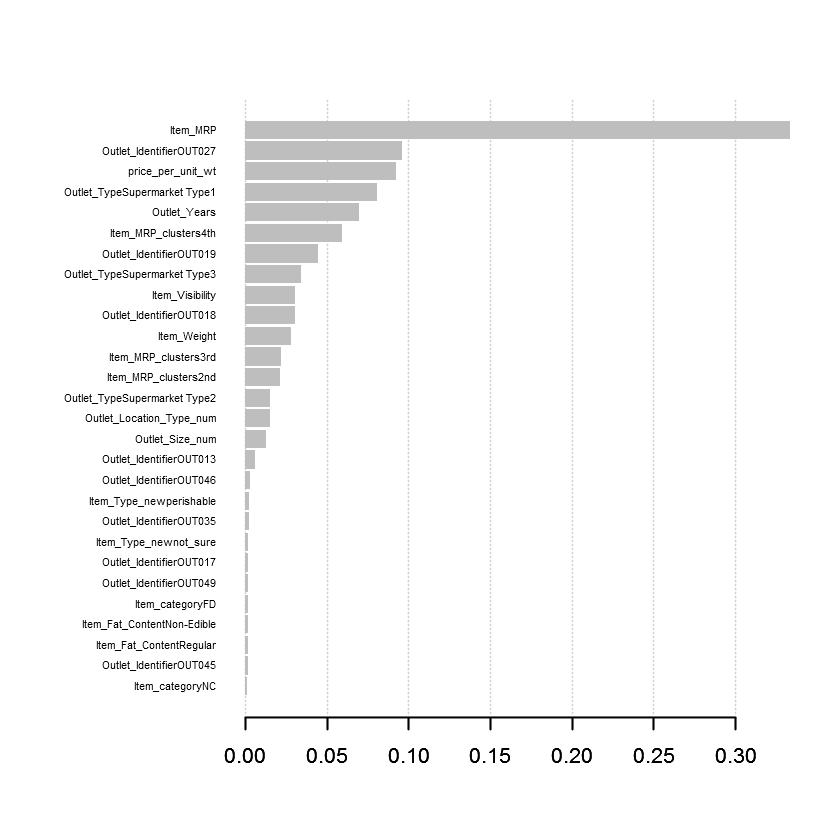

In [84]:
var_imp = xgb.importance(feature_names = setdiff(names(train), c("Item_Identifier", "Item_Outlet_Sales")),model = xgb_model) 
xgb.plot.importance(var_imp)

Again the features created by us, like price_per_unit_wt, Outlet_Years, Item_MRP_Clusters, are among the top most important variables.

## Summary

After trying and testing 5 different algorithms, the best score on the public leaderboard has been achieved by XGBoost (1155.84), followed by RandomForest (1157.66). However, there are still a plenty of things that we can try to further improve our predictions.

## What else can be tried…

There are still quite a many things that can be tried to improve our models’ predictions. We can create and add more variables, try different models with different subset of features, etc. Some of the ideas based on our EDA are listed below:

1. We can transform the target variable to reduce its skewness.


2. We can also make independent vs independent variable visualizations to discover some more patterns.


3. We found out four groups of Item_MRP in EDA. We can create a separate model for each of these groups and then combine the predictions.


4. Based on the violin plots, we can group the categories of the categorical variables which are quite similar in shape and size.


5. We can train the XGBoost model using grid search as done in the case of RandomForest.


6. We can even use different algorithms such as LightGBM or neural network based models.


7. Model ensembling can also be of great help in improving the model’s performance.

